In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import csv

import pickle
import os
import time

from utils.generate_data import *
from utils.sub_sampler import *
from utils.compute_barycenter import *
from utils.general_utils import *

# Data

### Generation

In [6]:
np.random.seed(12345)
nrep = 1
reps = []
nobs = int(1e4)
for r in range(nrep):
    data, clusters = gen_data(nobs=nobs)
    reps.append({'data': data, 'clusters': clusters})

# Save the generated data
# Adjust the path as necessary to match your directory structure
pd.to_pickle(reps, "data/input/mix_100k.pkl")

# Partitioning for k=10
npart = 10
nclust = 3
parts_k10 = partition_data(reps, npart, nclust)
pd.to_pickle(parts_k10, "data/input/wasp_mix_100k_k10.pkl")

# Partitioning for k=5
npart = 5
parts_k5 = partition_data(reps, npart, nclust)
pd.to_pickle(parts_k5, "data/input/wasp_mix_100k_k5.pkl")

### Visualization

In [7]:
data = np.array(data)

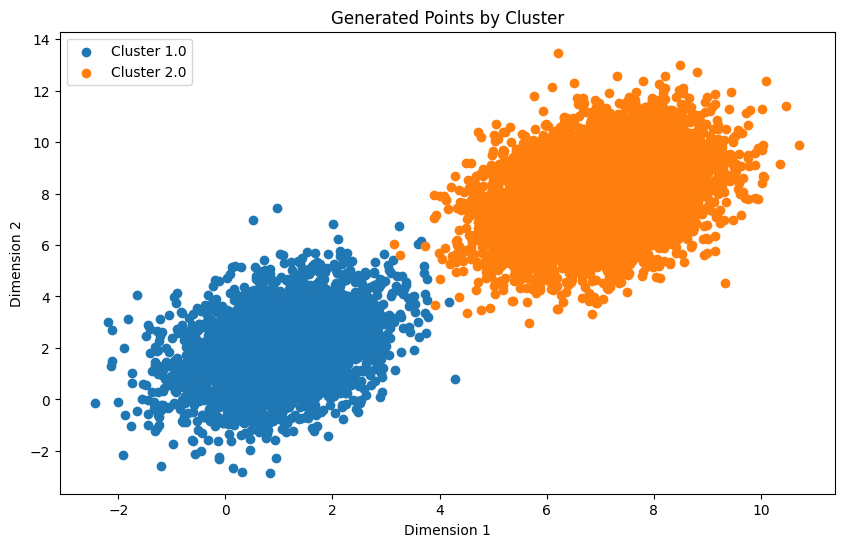

In [8]:
# Plotting
plt.figure(figsize=(10, 6))
for cluster in np.unique(clusters):
    plt.scatter(data[clusters == cluster, 0], data[clusters == cluster, 1], label=f'Cluster {cluster + 1}')
plt.title('Generated Points by Cluster')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()

### Sub-sampling

In [9]:
"""
x_res = []
for i, cluster in enumerate(parts_k5[0][0]):
    cluster = np.array(cluster)
    x_res.append(mvn_wasp_mix(cluster))
"""

100%|████████████████████████████████████████████████████████████████████████████| 10001/10001 [01:26<00:00, 115.99it/s]


In [ ]:
"""
## Switch the gaussian parameters to align with the other inferences 
k = 4
buffer = np.copy(x_res[k]['mu'][:, 0]) 
x_res[k]['mu'][:, 0] = np.copy(x_res[k]['mu'][:, 1]) 
x_res[k]['mu'][:, 1] = buffer
"""

In [24]:
"""
for i, res in enumerate(x_res):
    filename = f"data/sub-sampling/sample_{i}.pkl"
    with open(filename, 'wb') as file: 
        pickle.dump(res, file)
"""

### Load sub-sampling

In [6]:
x_res = []

for i in range(5):
    filename = f"data/sub-sampling/sample_{i}.pkl"
    with open(filename, 'rb') as file:  # Note the 'rb' mode for reading in binary mode
        data = pickle.load(file)
        x_res.append(data)

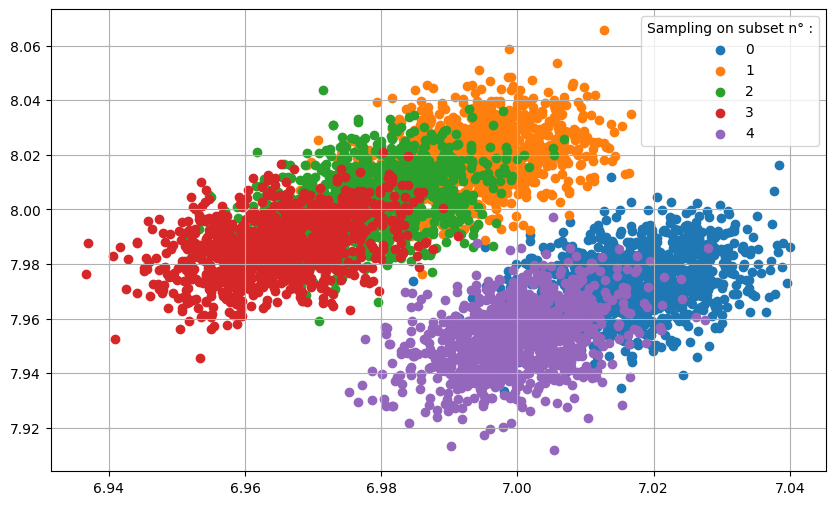

In [7]:
plt.figure(figsize=(10, 6))  # Set the figure size

for k in range(5):
    plt.scatter(x_res[k]['mu'][:, 0, 0], x_res[k]['mu'][:, 0, 1], label=k)

plt.legend(title="Sampling on subset n° :")
plt.grid(True)
plt.show()

### Merge

In [8]:
xsol, output, overallPost, subsetPost, cvec = main(dd=1, nsub=5, ndim=2)

/users/eleves-b/2020/victor.baillet/WASP-experiments/utils/compute_barycenter.py:29: OptimizeWarning: Sparse constraint matrix detected; setting 'sparse':True.
  res = linprog(cvec, A_eq=A_ub, b_eq=b_ub, bounds=bounds, options={'disp': False}, method=solver)
/users/eleves-b/2020/victor.baillet/WASP-experiments/utils/compute_barycenter.py:29: OptimizeWarning: Unknown solver options: sparse
  res = linprog(cvec, A_eq=A_ub, b_eq=b_ub, bounds=bounds, options={'disp': False}, method=solver)


Solution status: 0
Message: Optimization terminated successfully.
Solve time: 21.42360210418701


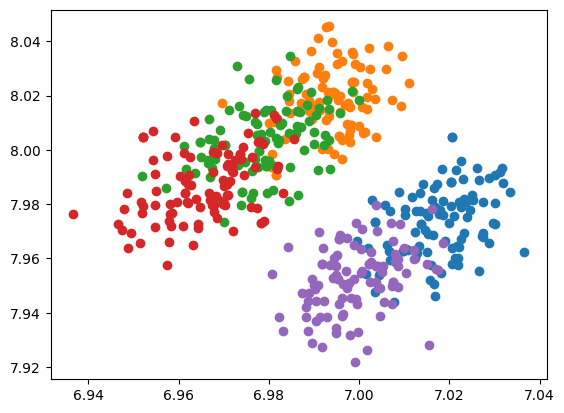

In [10]:
for k in range(5):
    plt.scatter(subsetPost[k, :, 0], subsetPost[k, :, 1])

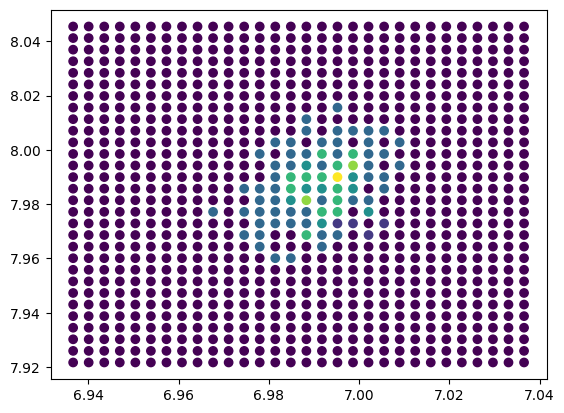

In [11]:
plt.scatter(overallPost[:, 0], overallPost[:, 1], c=xsol[:30*30])

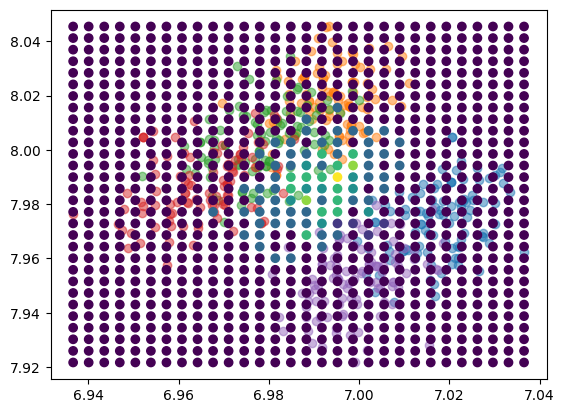

In [12]:
for k in range(5):
    plt.scatter(subsetPost[k, :, 0], subsetPost[k, :, 1], label=k, alpha=0.5)
plt.scatter(overallPost[:, 0], overallPost[:, 1], c=xsol[:30*30])